In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import utils
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [2]:
df = utils.load_suicide_healthcare_gini_df()
# ordering needed!
categories = ['5-14 years', '15-24 years', '25-34 years', '35-54 years',
                '55-74 years', '75+ years']
df.age = pd.Categorical(df.age, categories=categories, ordered=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2064 non-null   object 
 1   year                   2064 non-null   int64  
 2   sex                    2064 non-null   object 
 3   age                    2064 non-null   object 
 4   suicides_no            2064 non-null   int64  
 5   population             2064 non-null   int64  
 6   suicides_per_100k_pop  2064 non-null   float64
 7   gdp_for_year           2064 non-null   object 
 8   gdp_per_capita         2064 non-null   int64  
 9   generation             2064 non-null   object 
 10  country_code           2064 non-null   object 
 11  continent              2064 non-null   object 
 12  healthcare_coverage    2064 non-null   float64
 13  gini                   2064 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 241.9+ 

In [4]:
# counts = df.groupby(['country', 'year']).count()
counts = df.groupby(['country']).count()
# counts.where(counts < 12)
counts

,year,sex,age,suicides_no,population,suicides_per_100k_pop,gdp_for_year,gdp_per_capita,generation,country_code,continent,healthcare_coverage,gini
country,,,,,,,,,,,,,
Australia,24,24,24,24,24,24,24,24,24,24,24,24,24
Austria,72,72,72,72,72,72,72,72,72,72,72,72,72
Belgium,72,72,72,72,72,72,72,72,72,72,72,72,72
Canada,36,36,36,36,36,36,36,36,36,36,36,36,36
Chile,36,36,36,36,36,36,36,36,36,36,36,36,36
Colombia,72,72,72,72,72,72,72,72,72,72,72,72,72
Costa Rica,60,60,60,60,60,60,60,60,60,60,60,60,60
Czech Republic,72,72,72,72,72,72,72,72,72,72,72,72,72
Denmark,72,72,72,72,72,72,72,72,72,72,72,72,72


In [5]:
df.nunique()

country                    33
year                        6
sex                         2
age                         6
suicides_no               626
population               2037
suicides_per_100k_pop    1390
gdp_for_year              172
gdp_per_capita            172
generation                  5
country_code               33
continent                   5
healthcare_coverage        48
gini                       98
dtype: int64

In [6]:
# verify no na entries
df.isna().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides_per_100k_pop    0
gdp_for_year             0
gdp_per_capita           0
generation               0
country_code             0
continent                0
healthcare_coverage      0
gini                     0
dtype: int64

In [7]:
df.describe()

,year,suicides_no,population,suicides_per_100k_pop,gdp_per_capita,healthcare_coverage,gini
count,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000
mean,2012.3953488372,342.5232558140,2780080.6254844964,13.8181637597,39417.5872093023,97.7494186047,33.4145348837
std,1.6798245859,1007.1478595016,5294245.6709584603,17.1517172500,23203.0126182241,3.7178089507,6.8929155659
min,2010.0000000000,0.0000000000,7930.0000000000,0.0000000000,6552.0000000000,82.4000000000,24.9000000000
25%,2011.0000000000,15.0000000000,351098.2500000000,2.6200000000,17972.2500000000,96.0000000000,27.8000000000
50%,2012.0000000000,69.0000000000,715597.5000000000,8.3800000000,43015.5000000000,99.9500000000,32.3000000000
75%,2014.0000000000,231.0000000000,3308518.5000000000,19.2475000000,53541.2500000000,100.0000000000,35.3250000000
max,2015.0000000000,11767.0000000000,42798501.0000000000,182.3200000000,109804.0000000000,100.2000000000,54.6000000000


In [8]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,gdp_for_year,gdp_per_capita,generation,country_code,continent,healthcare_coverage,gini
2059,United States,2015,female,25-34 years,1444,21555712,6.7000000000,"18,120,714,000,000",60387,Millenials,USA,North America,90.9000000000,41.2000000000
2060,United States,2015,female,15-24 years,1132,21633813,5.2300000000,"18,120,714,000,000",60387,Millenials,USA,North America,90.9000000000,41.2000000000
2061,United States,2015,female,75+ years,540,11778666,4.5800000000,"18,120,714,000,000",60387,Silent,USA,North America,90.9000000000,41.2000000000
2062,United States,2015,male,5-14 years,255,21273987,1.2000000000,"18,120,714,000,000",60387,Generation Z,USA,North America,90.9000000000,41.2000000000
2063,United States,2015,female,5-14 years,158,20342901,0.7800000000,"18,120,714,000,000",60387,Generation Z,USA,North America,90.9000000000,41.2000000000


/var/folders/v4/5kdk6t_57x3gwhsz8x8jl_900000gn/T/ipykernel_43354/385709626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, ax=ax, vmin=-1, vmax=1)


<AxesSubplot: >

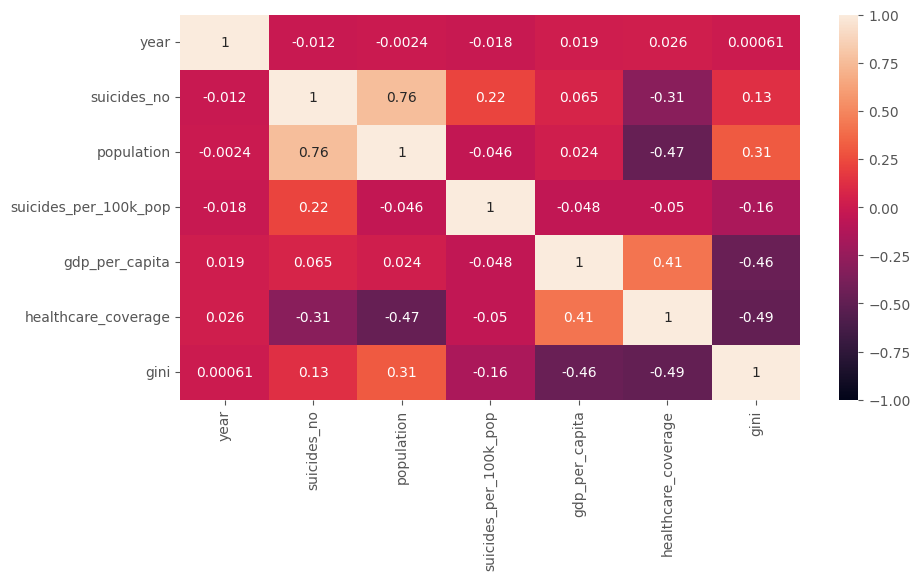

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, ax=ax, vmin=-1, vmax=1)

## Visual EDA

### World map for available countries

Text(0.5, 1.0, 'Countries included in dataset')

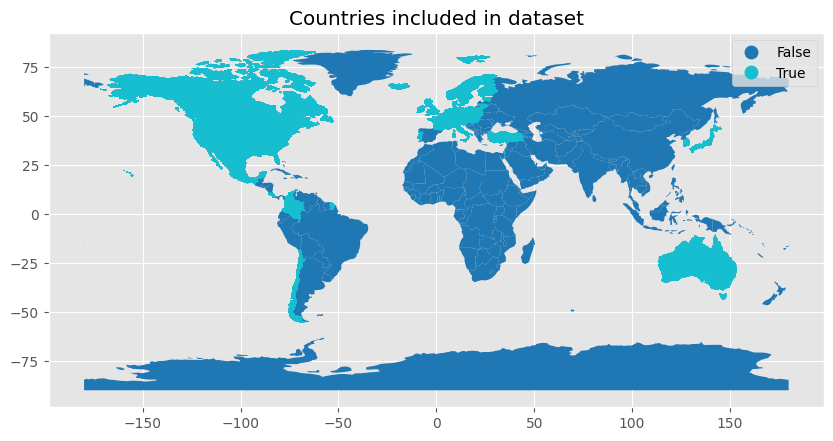

In [10]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns
geo_df = pd.merge(world,df,left_on='iso_a3',right_on='country_code', how='left')
geo_df['has_data'] = ~geo_df.gini.isna()
ax = geo_df.plot(column='has_data',
           figsize=(10, 10),
           legend=True)# ,cmap='cool')#
ax.set_title('Countries included in dataset')

Text(0.5, 1.0, 'Gini')

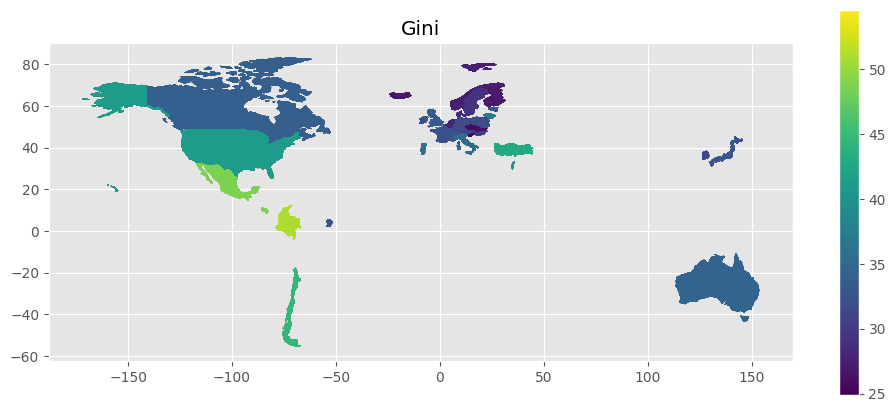

In [11]:
# gini comp
geo_df = pd.merge(world,df,left_on='iso_a3',right_on='country_code', how='left')
ax = geo_df.plot(column='gini',
           figsize=(12, 5),
           legend=True)
        #    vmin=0,
        #    vmax=100)# ,cmap='cool')#
ax.set_title('Gini')

Text(0.5, 1.0, 'Avg suicides_per_100k_pop between 2010 and 2015')

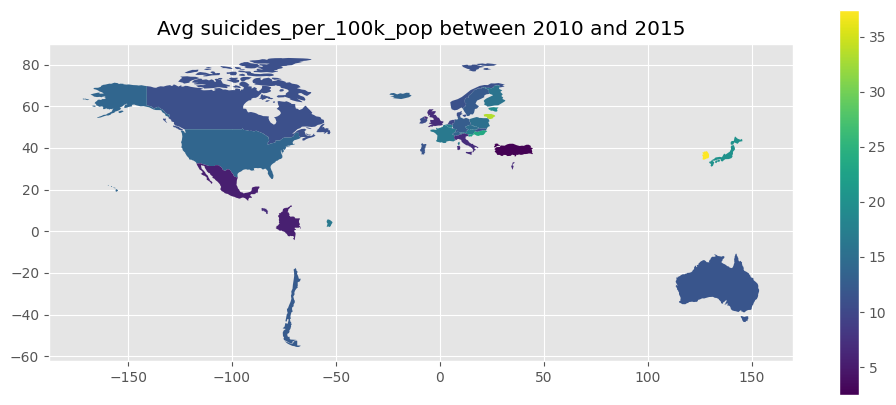

In [12]:
avg_per_year = df.groupby(['country_code'])['suicides_per_100k_pop'].mean().reset_index()
geo_df = pd.merge(world,avg_per_year,left_on='iso_a3',right_on='country_code', how='left')
ax = geo_df.plot(column='suicides_per_100k_pop',
           figsize=(12, 5),
           legend=True)# ,cmap='cool')#
ax.set_title('Avg suicides_per_100k_pop between 2010 and 2015')

### Avg Suicide rates comparison

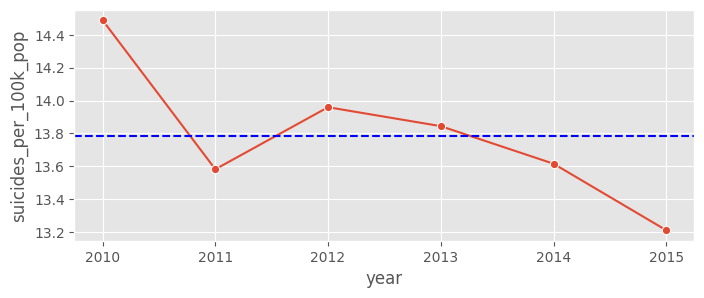

In [13]:
avg_per_year = df.groupby('year')['suicides_per_100k_pop'].mean().reset_index()
avg_per_year

fig,ax = plt.subplots(figsize=(8,3))
t = sns.lineplot(
    data=avg_per_year, 
    x='year', 
    y='suicides_per_100k_pop', 
    markers=True, 
    marker="o",
    ax=ax)
t.axhline(avg_per_year.suicides_per_100k_pop.mean(), linestyle='--', color='blue')

#### Avg per 100k rates by year and age

<AxesSubplot: xlabel='year', ylabel='suicides_per_100k_pop'>

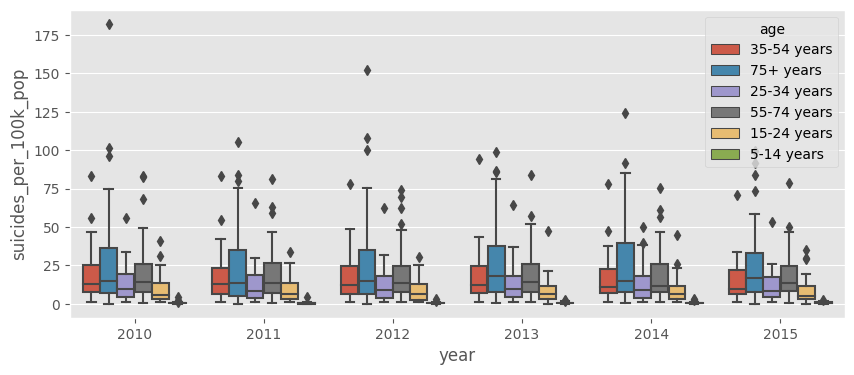

In [14]:
fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(data=df, x='year', y='suicides_per_100k_pop', hue='age', ax=ax)

In [15]:
# really high rates => correct but for age group with smaller population
# => when looking at whole population this evens out
high_sr = df[df.suicides_per_100k_pop > 30]
high_sr

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,gdp_for_year,gdp_per_capita,generation,country_code,continent,healthcare_coverage,gini
24,Austria,2010,male,75+ years,180,240431,74.8700000000,"391,892,746,545",49181,Silent,AUT,Europe,99.3000000000,30.3000000000
25,Austria,2010,male,55-74 years,287,838208,34.2400000000,"391,892,746,545",49181,Silent,AUT,Europe,99.3000000000,30.3000000000
36,Austria,2011,male,75+ years,196,245207,79.9300000000,"431,120,310,089",53923,Silent,AUT,Europe,99.9000000000,30.8000000000
37,Austria,2011,male,55-74 years,276,855700,32.2500000000,"431,120,310,089",53923,Boomers,AUT,Europe,99.9000000000,30.8000000000
48,Austria,2012,male,75+ years,189,250032,75.5900000000,"409,425,234,155",50979,Silent,AUT,Europe,99.9000000000,30.5000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,United States,2011,male,75+ years,2721,7448796,36.5300000000,"15,517,926,000,000",53452,Silent,USA,North America,84.9000000000,40.9000000000
2016,United States,2012,male,75+ years,2853,7633574,37.3700000000,"16,155,255,000,000",55170,Silent,USA,North America,85.3000000000,40.9000000000
2028,United States,2013,male,75+ years,2990,7816638,38.2500000000,"16,691,517,000,000",56520,Silent,USA,North America,85.5000000000,40.7000000000
2040,United States,2014,male,75+ years,3106,7994948,38.8500000000,"17,427,609,000,000",58531,Silent,USA,North America,88.5000000000,41.5000000000


#### Avg per 100k rates by year and sex

<AxesSubplot: xlabel='year', ylabel='suicides_per_100k_pop'>

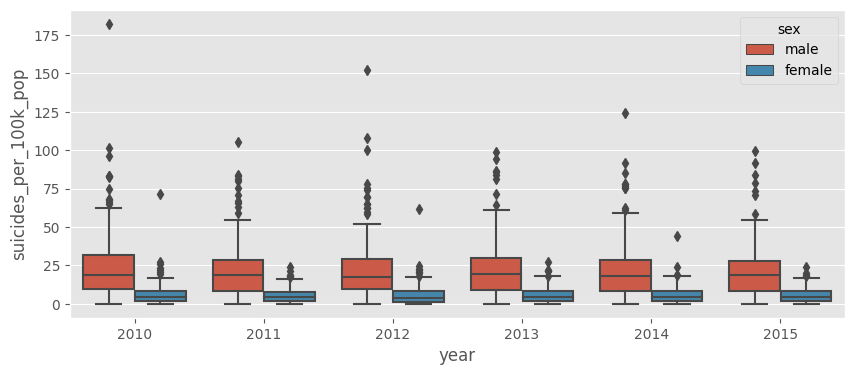

In [16]:
fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(data=df, x='year', y='suicides_per_100k_pop', hue='sex',ax=ax)

#### Avg per 100k rates by year and continent

<AxesSubplot: xlabel='year', ylabel='suicides_per_100k_pop'>

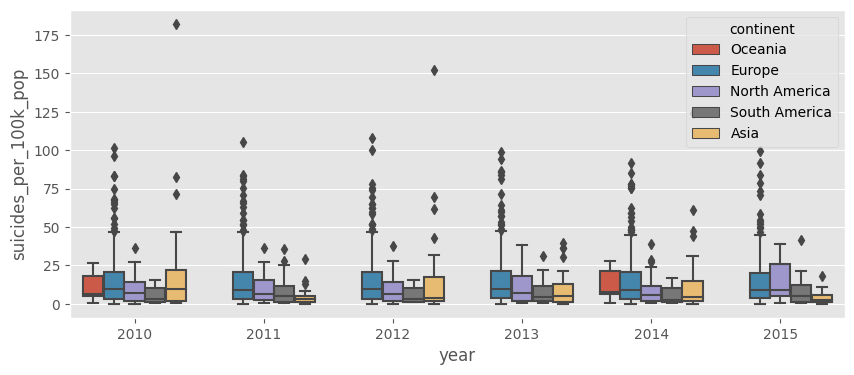

In [17]:
fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(data=df, x='year', y='suicides_per_100k_pop', hue='continent',ax=ax)

### Suicides rates trends

(-3.0, 3.0)

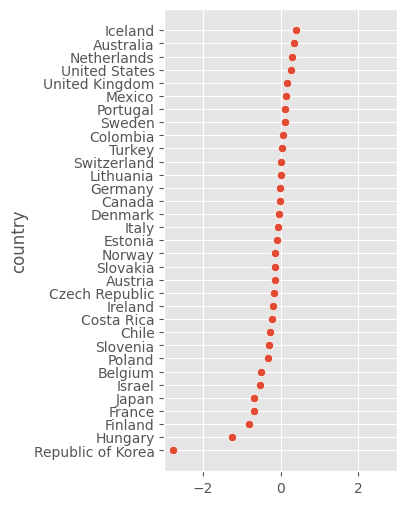

In [18]:
by_country_and_year = df.groupby(['country','year'])['suicides_per_100k_pop'].mean().reset_index()

by_country_and_year
# by_country_and_year= by_country_and_year[by_country_and_year.country == 'Germany']
# sns.relplot(data=by_country_and_year,x="year",y="per100k", col="country",kind="scatter", col_wrap=8)


def trendline(x, y, order=1):
    slope = np.polyfit(x, y, order)[-2]
    return float(slope)

def apply_trendline(df):
    return trendline(df.year.values, df.suicides_per_100k_pop.values)

trends = by_country_and_year.groupby('country').apply(apply_trendline).sort_values()[::-1]
# sns.scatterplot(trends_per_country, y='country')
fig, ax = plt.subplots(figsize=(3,6))
sns.scatterplot(x=trends.values, y=trends.keys(), ax=ax)
ax.set_xlim(-3,3)



Text(0.5, 0.98, 'Top 6 decreasing rates')

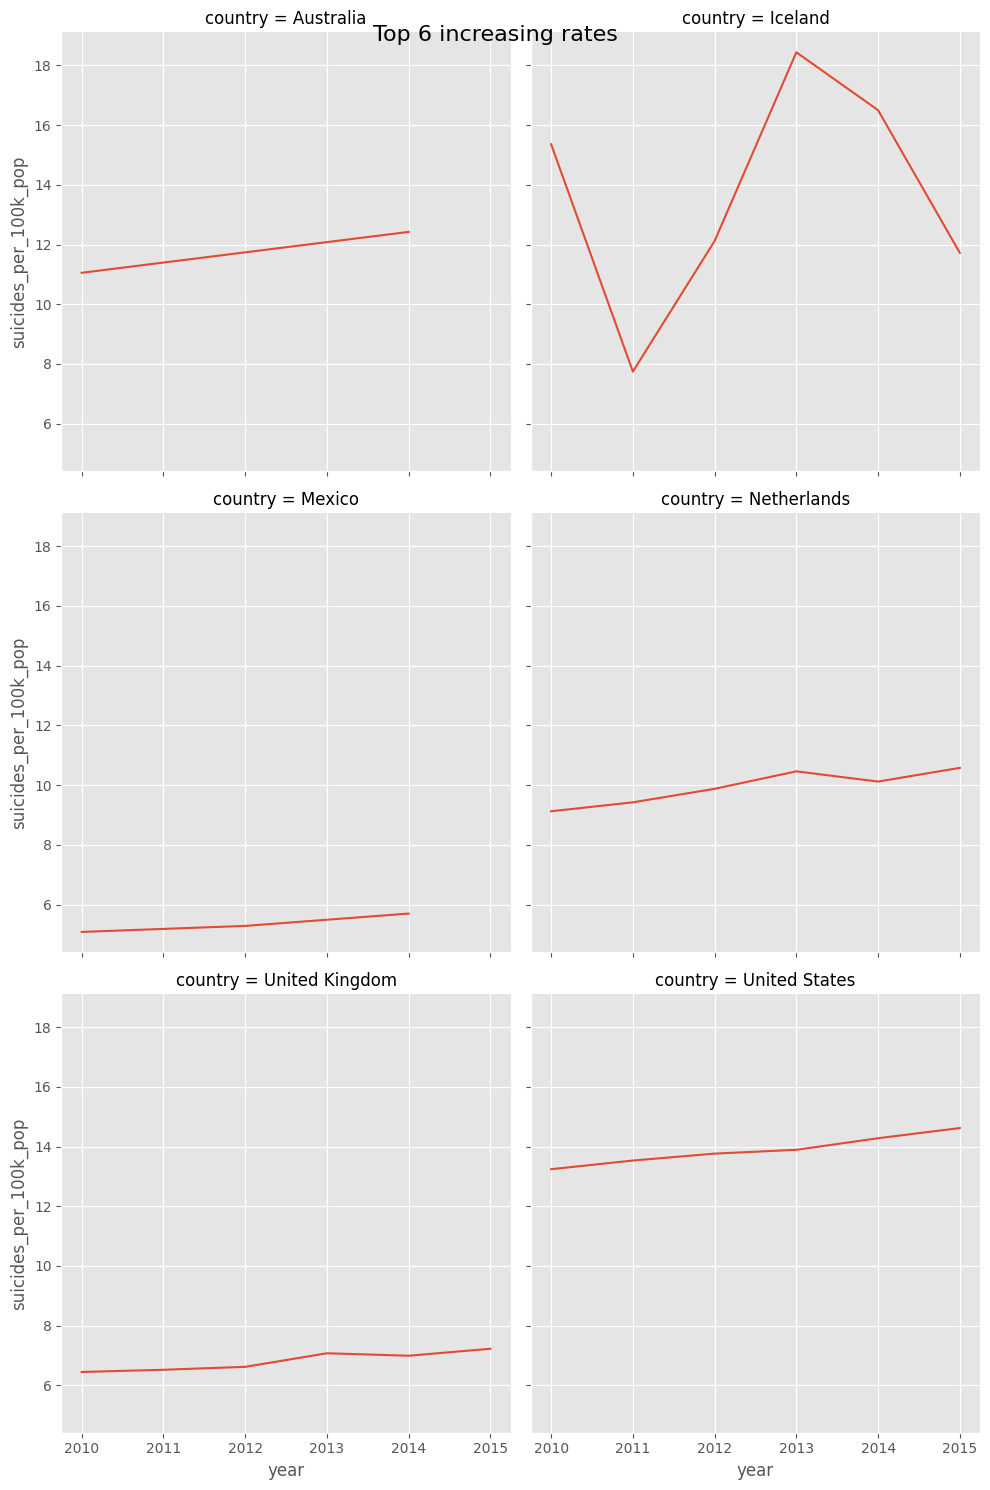

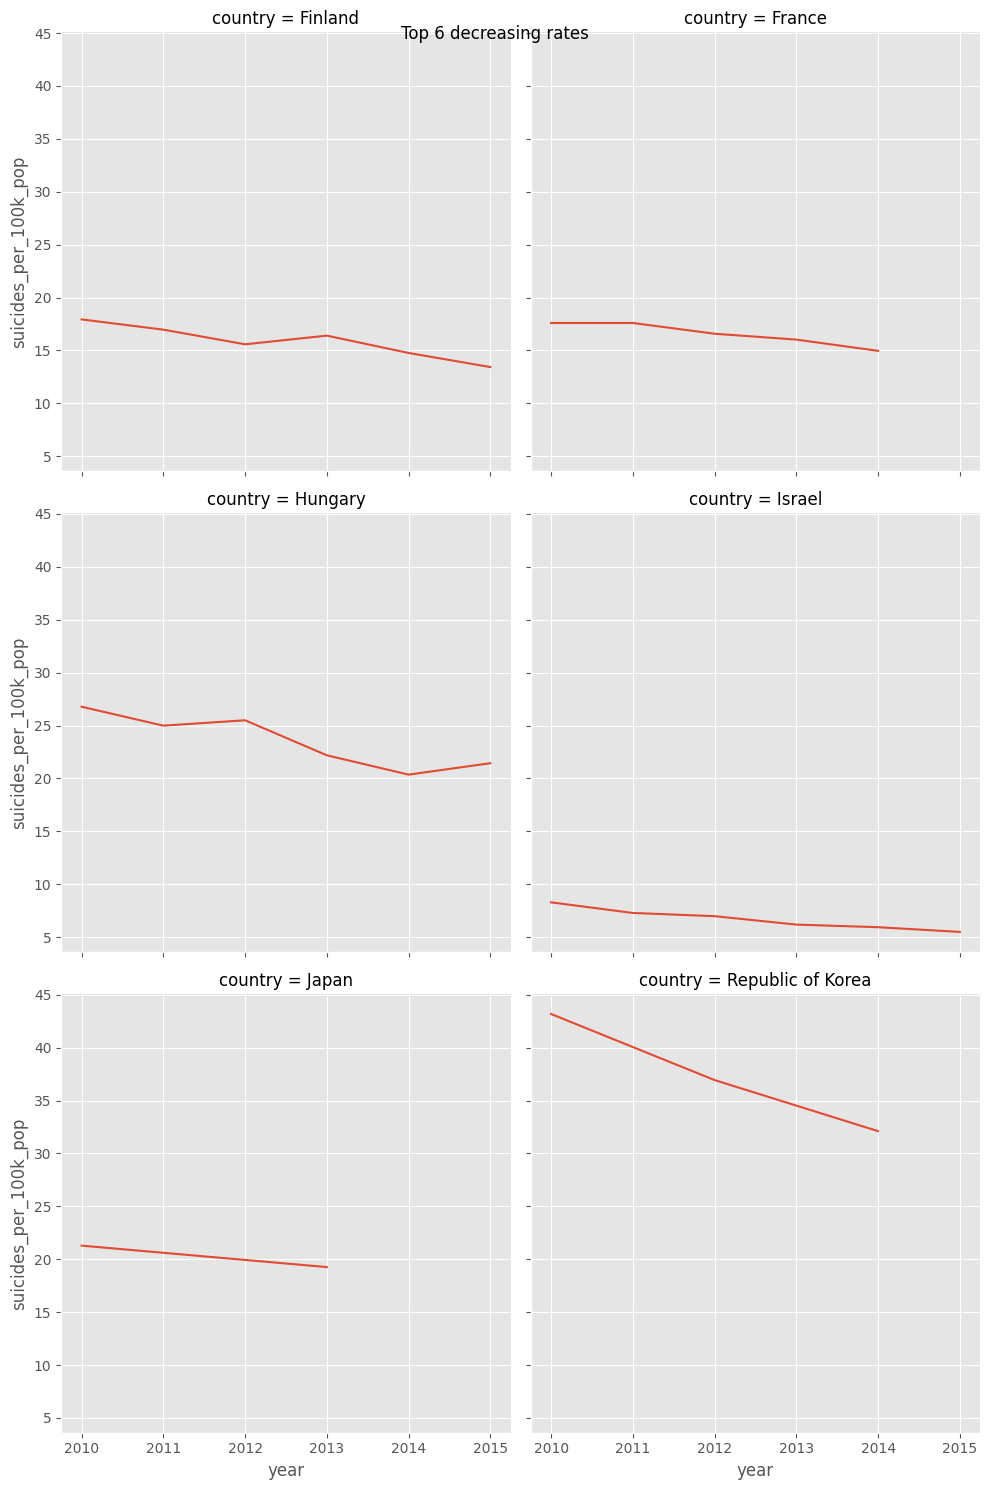

In [19]:
top_n_incr_trends = by_country_and_year[by_country_and_year.country.isin(
    trends[:6].keys())]
incr_plot = sns.relplot(
    data=top_n_incr_trends, x='year', y='suicides_per_100k_pop', col='country', col_wrap=2, kind='line')
incr_plot.fig.suptitle('Top 6 increasing rates', fontsize=16)
top_n_decr_trends = by_country_and_year[by_country_and_year.country.isin(
    trends[-6:].keys())]
decr_plot= sns.relplot(
    data=top_n_decr_trends, x='year', y='suicides_per_100k_pop', col='country', col_wrap=2, kind='line')
decr_plot.fig.suptitle('Top 6 decreasing rates')
